<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/Naive_Bayes_Implementation(01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#import all libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (7, 4)

In [27]:
#load the dataset:
data = load_breast_cancer()
X = data.data
y = data.target

In [28]:
#class distribution:
y_distro = pd.Series(y).map({0: 'malignant', 1: 'benign'})
y_distro.value_counts()

,count
benign,357
malignant,212


In [34]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state=42, stratify=y
)

In [35]:
#create gaussian naive bayes model , training and prediction
gaussianNB_model = GaussianNB()
gaussianNB_model.fit(X_train, y_train)

y_pred = gaussianNB_model.predict(X_test)

Accuracy : 0.9370629370629371


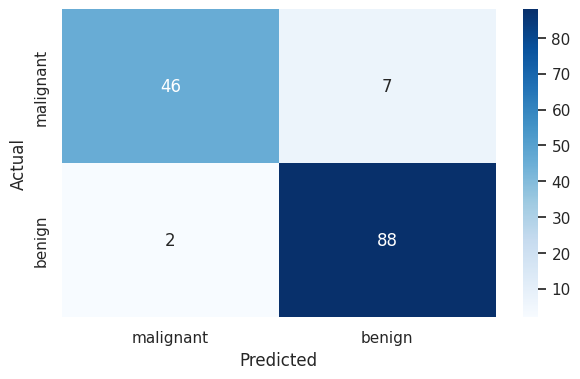

Classification Report:
               precision    recall  f1-score   support

   malignant       0.96      0.87      0.91        53
      benign       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



In [42]:
#find accuracy :
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)


#confusion matrix :
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=data.target_names,
    yticklabels=data.target_names
    )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# calssification report :
class_report = classification_report(y_test, y_pred,target_names = data.target_names)
print("Classification Report:\n", class_report)
